<a href="https://colab.research.google.com/github/imTheDevil/automobile_ML/blob/main/AutoMobile_(Reg_UCIML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(8,4)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/automobile/imports-85.data",
                 names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])

##**Data Cleaning**

**Cleaning**

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isnull().sum() #since the missing values are in '?' we get all 0

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.shape

(205, 26)

**Working on missing values in normalized-losses column**

***Since the normalized-losses column is of 'object' datatype,
we cannot convert it to 'int' as they also contain 'NaN' values.<br />
So, I first converted the non NaN values to int and calculated the median.<br />
I then replaced the NaN values with the median value and later converted the whole column to 'int' in the below code***

In [9]:
median_normloss = df[df['normalized-losses'].notna()]['normalized-losses'].astype(int).median()
median_normloss

115.0

In [10]:
df['normalized-losses']=df['normalized-losses'].replace(np.nan, median_normloss)

In [11]:
df['normalized-losses']=df['normalized-losses'].astype(int)

**Working on missing values in num-of-doors column**

In [12]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [13]:
door_freq = df['num-of-doors'].value_counts().index[0]
door_freq

'four'

In [14]:
df['num-of-doors']=df['num-of-doors'].replace(np.nan, door_freq)

**Working on missing values in bore and stroke column**

In [15]:
median_bore = df[df['bore'].notna()]['bore'].astype(float).median()
median_bore

3.31

In [16]:
df['bore']=df['bore'].replace(np.nan, median_bore)

In [17]:
df['bore']=df['bore'].astype(float)

In [18]:
median_stroke = df[df['stroke'].notna()]['stroke'].astype(float).median()
median_stroke

3.29

In [19]:
df['stroke']=df['stroke'].replace(np.nan, median_stroke)

In [20]:
df['stroke']=df['stroke'].astype(float)

**Working on missing values in horsepower and peak-rpm column**

In [21]:
median_hp = df[df['horsepower'].notna()]['horsepower'].astype(int).median()
median_hp

95.0

In [22]:
df['horsepower']=df['horsepower'].replace(np.nan, median_hp)

In [23]:
df['horsepower']=df['horsepower'].astype(int)

In [24]:
median_rpm = df[df['peak-rpm'].notna()]['peak-rpm'].astype(int).median()
median_rpm

5200.0

In [25]:
df['peak-rpm']=df['peak-rpm'].replace(np.nan, median_rpm)

In [26]:
df['peak-rpm']=df['peak-rpm'].astype(int)

**Working on missing values in price column**

In [27]:
median_price = df[df['price'].notna()]['price'].astype(int).median()
median_price

10295.0

In [28]:
df['price']=df['price'].replace(np.nan, median_price)

In [29]:
df['price']=df['price'].astype(int)

In [30]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##**EDA**

**EDA**

In [32]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Univariate Analysis**

In [34]:
makers = df['make'].value_counts().index

In [35]:
model_count = df['make'].value_counts().values

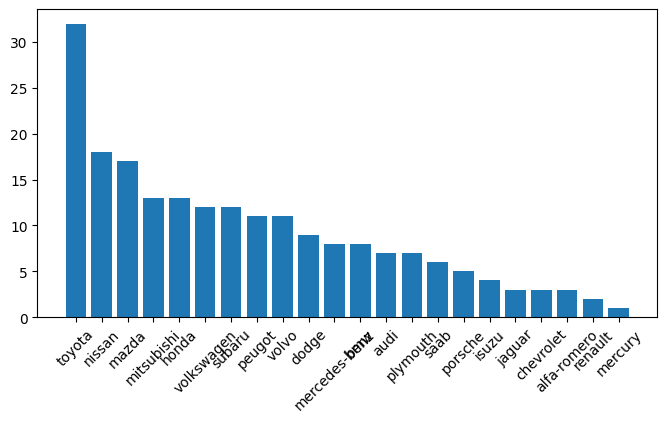

In [36]:
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()

In [37]:
df[['make', 'fuel-type']].groupby(['make', 'fuel-type']).size().reset_index()

,make,fuel-type,0
0,alfa-romero,gas,3
1,audi,gas,7
2,bmw,gas,8
3,chevrolet,gas,3
4,dodge,gas,9
5,honda,gas,13
6,isuzu,gas,4
7,jaguar,gas,3
8,mazda,diesel,2
9,mazda,gas,15


In [38]:
make_price = df[['make', 'price']].sort_values(by=['price'], ascending=False)
make_price.head()

,make,price
74,mercedes-benz,45400
16,bmw,41315
73,mercedes-benz,40960
128,porsche,37028
17,bmw,36880


In [39]:
make_price.tail()

,make,price
76,mitsubishi,5389
150,toyota,5348
50,mazda,5195
18,chevrolet,5151
138,subaru,5118


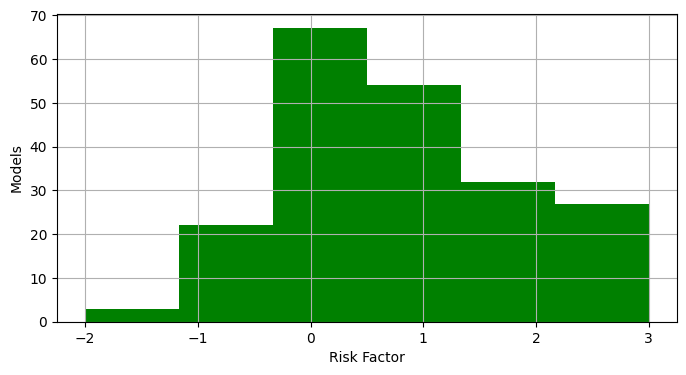

In [40]:
plt.figure(figsize=(8,4))
plt.hist(df['symboling'], bins=6, color='green')
plt.xlabel('Risk Factor')
plt.ylabel('Models')
plt.grid()
plt.show()

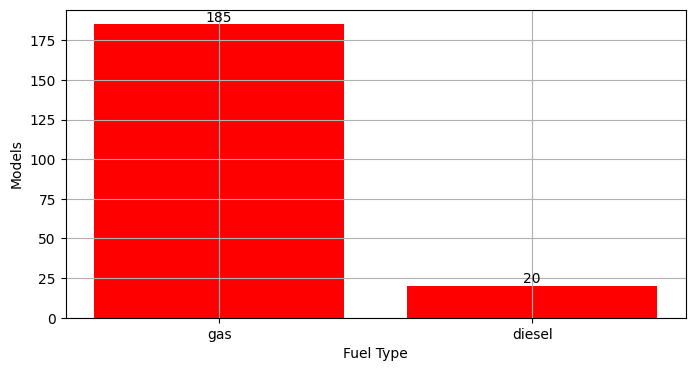

In [41]:
x = df['fuel-type'].value_counts().index
y = df['fuel-type'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='red')
plt.xlabel('Fuel Type')
plt.ylabel('Models')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

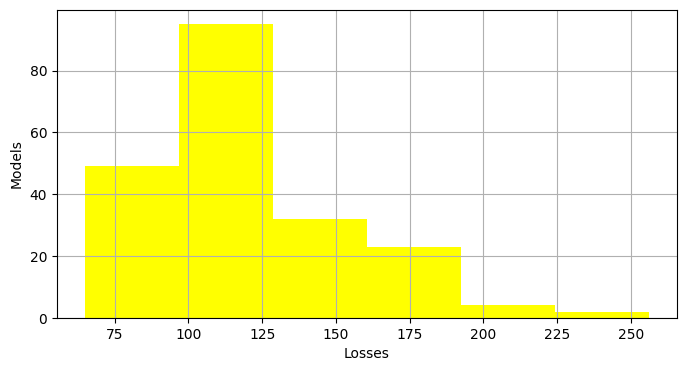

In [42]:
plt.figure(figsize=(8,4))
plt.hist(df['normalized-losses'], bins=6, color='yellow')
plt.xlabel('Losses')
plt.ylabel('Models')
plt.grid()
plt.show()

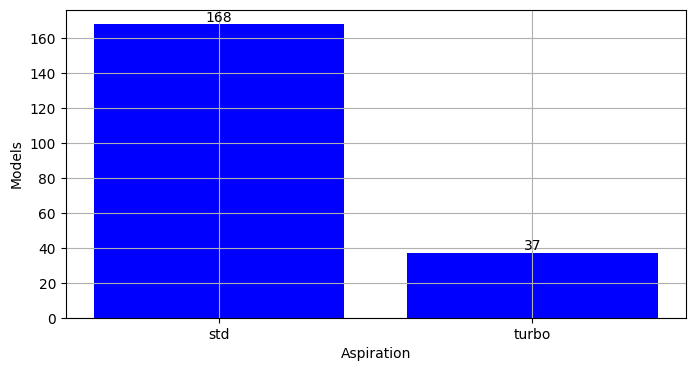

In [43]:
x = df['aspiration'].value_counts().index
y = df['aspiration'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='blue')
plt.xlabel('Aspiration')
plt.ylabel('Models')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

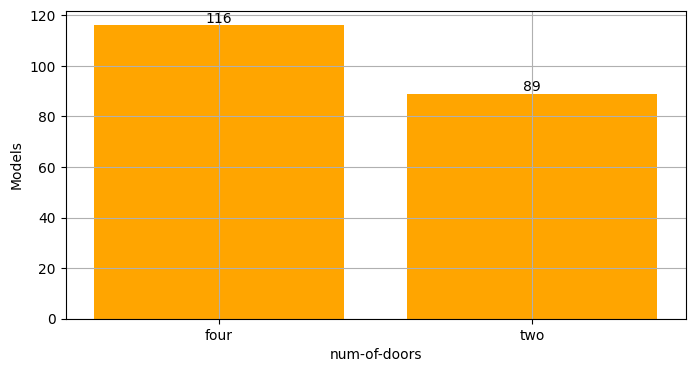

In [45]:
x = df['num-of-doors'].value_counts().index
y = df['num-of-doors'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='orange')
plt.xlabel('num-of-doors')
plt.ylabel('Models')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

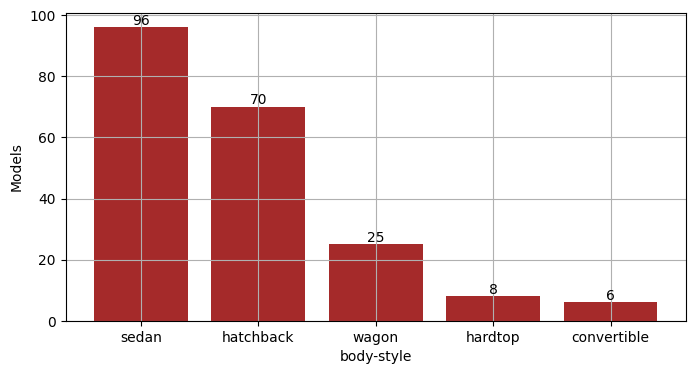

In [46]:
x = df['body-style'].value_counts().index
y = df['body-style'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='brown')
plt.xlabel('body-style')
plt.ylabel('Models')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

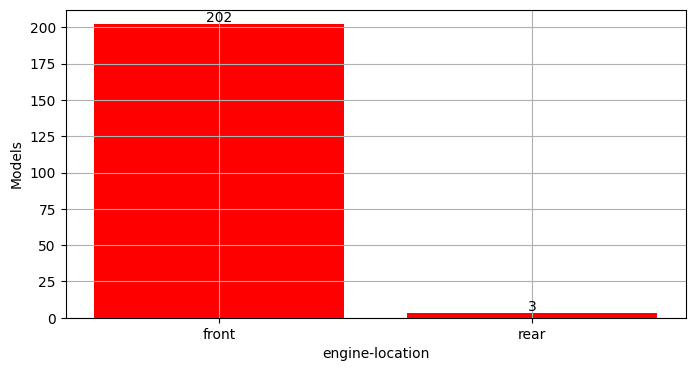

In [47]:
x = df['engine-location'].value_counts().index
y = df['engine-location'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y, color='red')
plt.xlabel('engine-location')
plt.ylabel('Models')

for i, j in enumerate(y):
  plt.text(i, j, str(j), ha='center', va='bottom')

plt.grid()
plt.show()

**Bivariate Analysis**

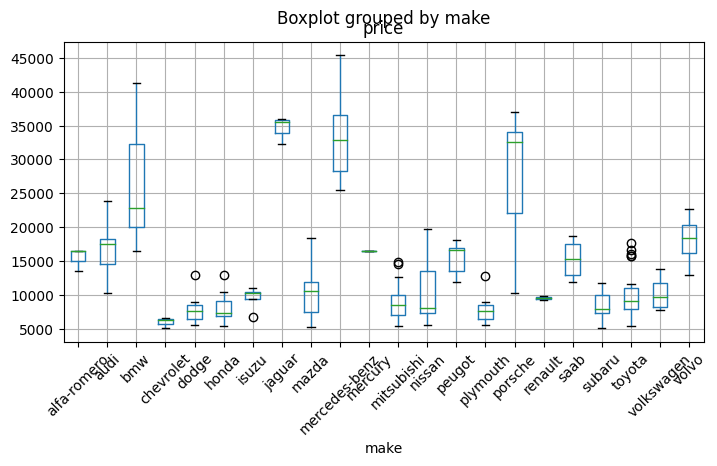

In [48]:
df.boxplot('price', by='make')
plt.xticks(rotation=45)
plt.show()

In [49]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

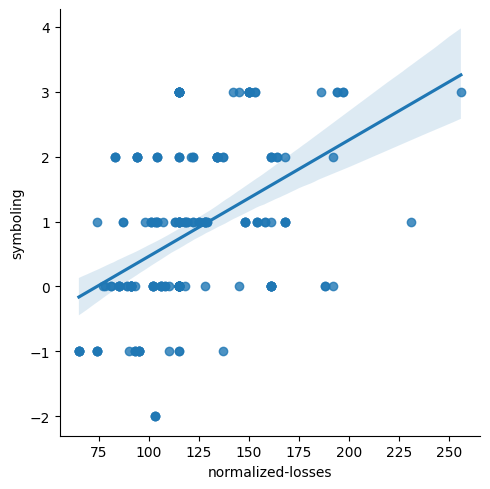

In [50]:
sns.lmplot(x='normalized-losses', y='symboling', data=df)

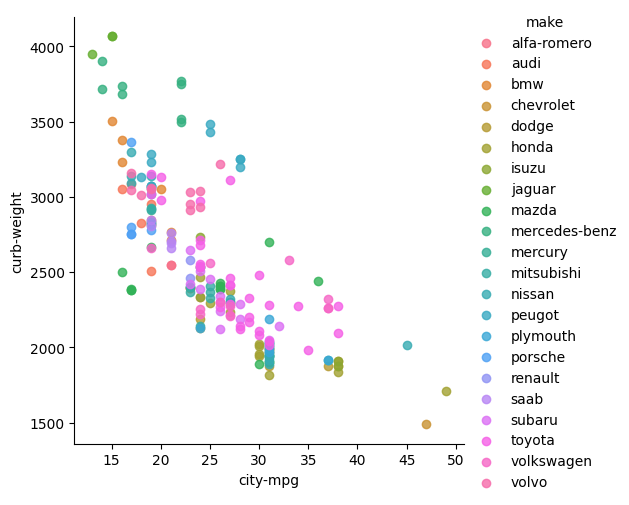

In [51]:
sns.lmplot(x='city-mpg', y='curb-weight', data=df, hue='make', fit_reg=False)

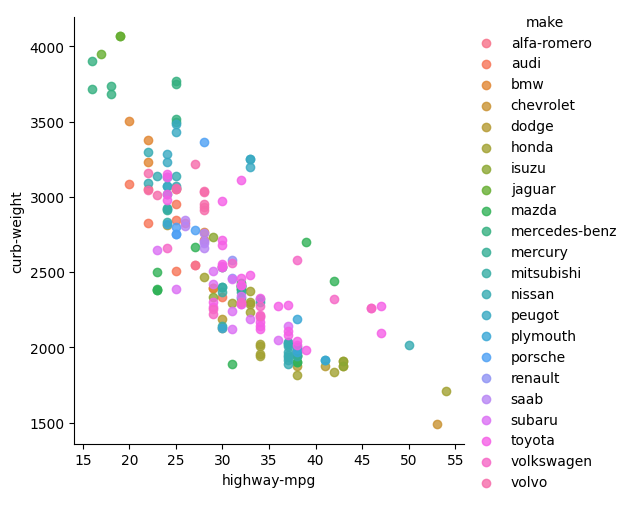

In [52]:
sns.lmplot(x='highway-mpg', y='curb-weight', data=df, hue='make', fit_reg=False)

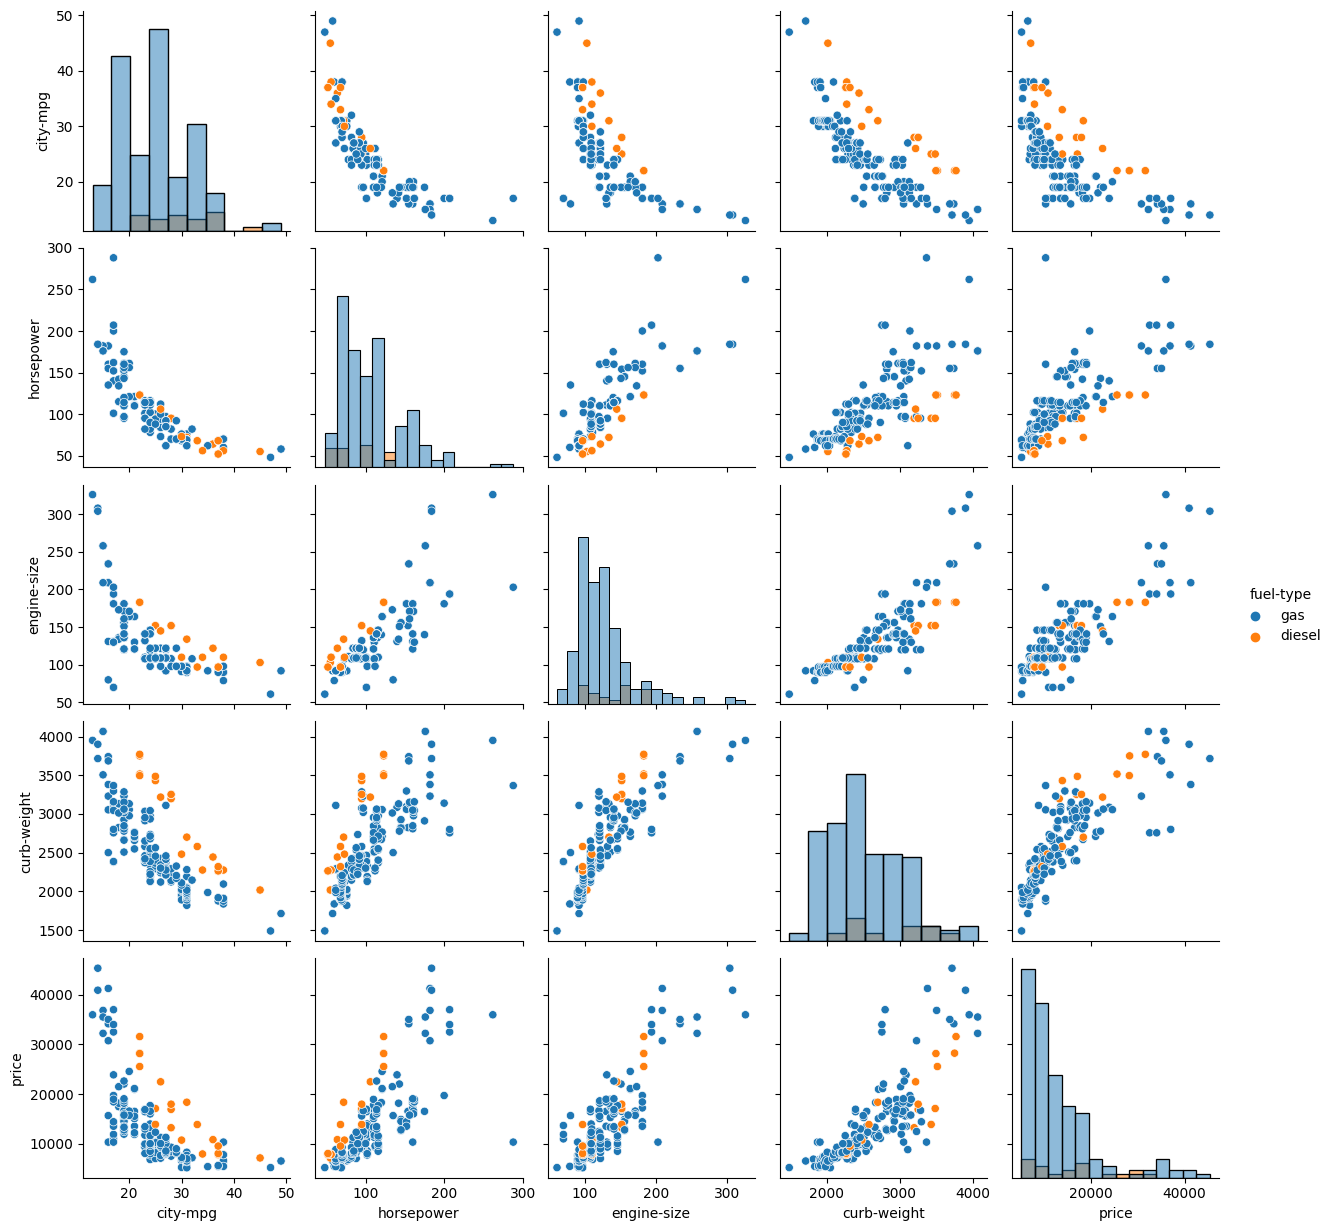

In [53]:
sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

**Can do more EDA.......**

##**Categorical Encoding**

In [54]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [56]:
df['fuel-type']=df['fuel-type'].map({'gas':1, 'diesel':2})

In [57]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [58]:
df['aspiration']=df['aspiration'].map({'std':1, 'turbo':2})

In [59]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [60]:
df['num-of-doors']=df['num-of-doors'].map({'two':2, 'four':4})

In [61]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [62]:
df['drive-wheels']=df['drive-wheels'].map({'rwd':1, 'fwd':2, '4wd':3})

In [63]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,1,1,2,convertible,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,1,1,2,convertible,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,1,1,2,hatchback,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,1,1,4,sedan,2,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,1,1,4,sedan,3,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [64]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [65]:
df['engine-location']=df['engine-location'].map({'front':1, 'rear':2})

In [66]:
df['num-of-cylinders'].value_counts().index

Index(['four', 'six', 'five', 'eight', 'two', 'three', 'twelve'], dtype='object')

In [67]:
df['num-of-cylinders']=df['num-of-cylinders'].map({'four':3, 'six':5, 'five':4, 'three':2, 'twelve':7, 'two':1, 'eight':6})

In [68]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [69]:
df['fuel-system']=df['fuel-system'].map({'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8})

In [70]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [71]:
df['engine-type']=df['engine-type'].map({'dohc':1, 'ohcv':2, 'ohc':3, 'l':4, 'rotor':5, 'ohcf':6, 'dohcv':7})

In [72]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [73]:
df['body-style']=df['body-style'].map({'convertible':1, 'hatchback':2, 'sedan':3, 'wagon':4, 'hardtop':5})

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['make']=le.fit_transform(df['make'])

In [75]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,0,1,1,2,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,0,1,1,2,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,0,1,1,2,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,1,4,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,1,4,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450


##**Feature Selection**

**Correlation Matrix and Heatmap**

**Its not necessary to use a scaled data while calculating correlation matrix. <br/> Since, correlation represents the strength and direction of correlation of 2 independent variables, scaling them doesnot effect the coefficients.**

In [76]:
cor = df.corr(method='spearman')
cmap = sns.diverging_palette(230, 30, as_cmap=True)

<Axes: >

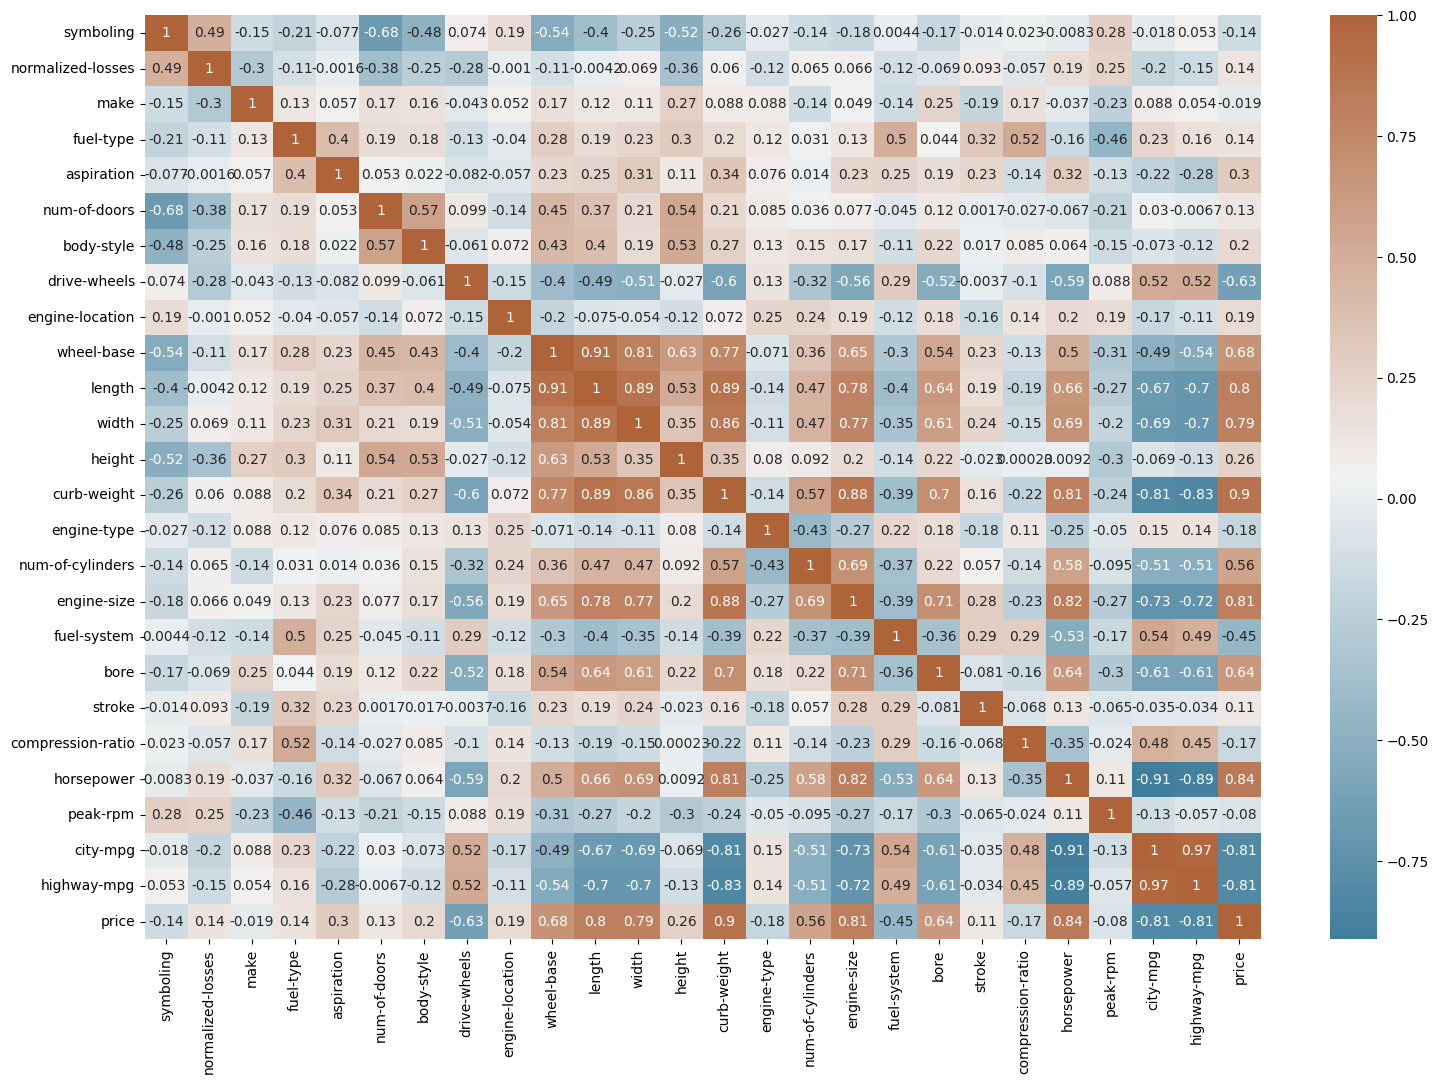

In [77]:
plt.figure(figsize=(18,12))
sns.heatmap(cor, cmap=cmap, annot = True)

**Uinvariate Analysis**

**Univariate Statistical tests are typically applied individually to each features.<br/> They assess the replationship between that perticular feature and target variable individually. These methods evaluate the statistical significance or relevance of each feature based on its own distribution and characteristics, without considering the relationships with other features.<br/> So the tests only focus on that perticular feature and not the relationship between two or more independent features.<br/> So scaled data is not required.**

In [78]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [79]:
xdf = pd.DataFrame(X, columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'])
ydf = pd.DataFrame(y, columns=['price'])

**Chi2 Test doesnot aplly to negative values.<br/>
It's logical because the chi square test assumes frequencies distribution and a frequency can't be a negative number.<br/>
So converting/scaling the first "symboling" column to 0-1(Normalization)**

In [80]:
column_to_scale = xdf['symboling'].values.reshape(-1,1)

In [81]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
xdf['symboling']=ms.fit_transform(column_to_scale)

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func=chi2, k=25)
fit = kbest.fit(xdf.values, y)

In [83]:
ua_scores = pd.DataFrame(fit.scores_)
ua_columns = pd.DataFrame(xdf.columns)

In [84]:
ua_rank_df = pd.concat([ua_columns, ua_scores]
                       , axis=1)

In [85]:
ua_rank_df.columns=['col_name', 'score']
ua_rank_df.sort_values(by='score', ascending=False)

,col_name,score
13,curb-weight,20882.702156
22,peak-rpm,8884.658848
16,engine-size,2712.427833
21,horsepower,2710.375340
1,normalized-losses,1680.374793
2,make,618.320600
17,fuel-system,369.303150
23,city-mpg,325.058704
24,highway-mpg,300.134835
20,compression-ratio,298.584797


**Extra Trees Classifier**

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [87]:
et_scores = pd.DataFrame(model.feature_importances_)
et_columns = pd.DataFrame(xdf.columns)

In [88]:
et_rank_df = pd.concat([et_columns, et_scores]
                       , axis=1)
et_rank_df.columns=['col_name', 'score']
et_rank_df.sort_values(by='score', ascending=False)

,col_name,score
13,curb-weight,0.195941
6,body-style,0.060703
23,city-mpg,0.059967
1,normalized-losses,0.058776
12,height,0.058589
24,highway-mpg,0.048874
10,length,0.041194
9,wheel-base,0.040691
18,bore,0.039475
11,width,0.039283


**So using the information above, I can now drop a few columns**

In [89]:
xdf.drop(['engine-location', 'symboling', 'aspiration','stroke'], axis=1, inplace=True)

In [90]:
#just copying xdf to X

df_x = xdf.copy(deep=True)

In [91]:
X = df_x.iloc[:, :-1].values
y = df.iloc[:, -1].values

##**Feature Extraction**

**First trying to evaluate the performance without applying dimensionality reduction...**

##**Models**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [93]:
def r2_adj(x, y):
  r2 = reg.score(x, y)
  n=x.shape[0]
  p=x.shape[1]
  adjr2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adjr2

**Multiple Linear Regression**

In [94]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [95]:
r2_adj(X_test, y_test)

-0.004102885888247032

In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10)

In [97]:
print(accuracies.mean()*100)

68.6916265706553


In [98]:
print(accuracies.std()*100)

39.64797388521853


***Comments from above score***<br/>
The Adj R2 is negative which means the model is performing worse.<br/>
Reason may be a huge number a dimensions and small sample/dataset.<br/>
Try reducing dimensions using various dimensionality reduction techniques.
